## Creating CNN Using Scratch And Transfer Learning

Please download the dataset from the below url

In [1]:
'''
 Uso di tecniche di transferlearning per adattare una CNN vgg19 al task di riconoscimento
 di un soggetto infetto o sano da immagini di cellule 

 Importing da kerar le librerie base incluse quello riguardanti da data ugmentation e VGG19

 Il dataset da Kaggle:

 Test
     Parasite
     Uninfected
 Training
     Parasite
     Uninfected    
'''

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
'''
 Resetting le dimensioni dell'immagine 224x224
 e i path del train e test set
'''
IMAGE_SIZE = [224, 224]

train_path = 'cell_images/Train'
valid_path = 'cell_images/Test'


In [3]:
'''
 setting della VGG19 settango i pesi come "imagenet" 
 (perchè il modello è stato trainato con quei parametri) 
 l'image_size e [3] canali RGB
'''

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [4]:
'''
 Non si alleneranno i layer già allenati
'''
for layer in mobilnet.layers:
    layer.trainable = False

In [5]:
'''
 Si prende il numero delle classi in base al numero
 delle cartelle dal numero di sottocartelle in "Train"
'''
folders = glob('Dataset/Train/*')

#folders

In [6]:
'''
 Effettuiamo il flattening dei livelli già presenti
'''
x = Flatten()(mobilnet.output)

In [7]:
'''
 Settiamo i layer con quantitativo di classi come "2" e 
 funzione di attivazione "Softmax"
'''

prediction = Dense(len(folders), activation='softmax')(x)

'''
 Creiamo il modello settando come imput "mobilnet" e le nostre
 preciction come output
'''
model = Model(inputs=mobilnet.input, outputs=prediction)
'''
Struttura del modello
'''
#model.summary()
epoch=30

In [8]:
from tensorflow.keras.layers import MaxPooling2D

In [9]:
### Create Model from scratch using CNN
'''
 Creo un modello CNN da 0 tentando di paragonare le performances con la VGG19 
 NOTA: Funzione di attivazione: Relu tranne l'ultima che è softmatx 
       (se avessi un solo nodo Sigmoide sarebbe meglio)
'''
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()
epoch=50

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0

In [10]:
'''
 Compilo il modello settando la funzione di loss (crossEntropy)
 e come ottimizzatore "Adam"
'''
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [11]:
'''
 Effettuiamo della data augmentation sul training set e test set
 NOTA: Sul test set fare solo il rescaling in 255 pixel
'''
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
'''
 Settiamo iol training set a partire dal training datagen  settando la cartella
 del training set, la dimensione del batch (Per l'uso della RAM) e la class mode
'''
training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

#training_set                                                 

Found 416 images belonging to 2 classes.


In [13]:
'''
 Facciamo la stessa cosa col test set
'''
test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')
#test_set                                            

Found 134 images belonging to 2 classes.


In [14]:
'''
 Effettuo il fitting del modello
'''
r = model.fit(
  training_set,
  validation_data=test_set,
  steps_per_epoch=len(training_set),
  epochs=epoch
 )

Epoch 1/50
13/13 [==============================] - 6s 420ms/step - loss: 1.4749 - accuracy: 0.5120 - val_loss: 0.6635 - val_accuracy: 0.6791
Epoch 2/50
13/13 [==============================] - 5s 411ms/step - loss: 0.7327 - accuracy: 0.5577 - val_loss: 0.7256 - val_accuracy: 0.3657
Epoch 3/50
13/13 [==============================] - 6s 416ms/step - loss: 0.6723 - accuracy: 0.6106 - val_loss: 0.7056 - val_accuracy: 0.3731
Epoch 4/50
13/13 [==============================] - 6s 415ms/step - loss: 0.6297 - accuracy: 0.6923 - val_loss: 0.7976 - val_accuracy: 0.2537
Epoch 5/50
13/13 [==============================] - 6s 416ms/step - loss: 0.5623 - accuracy: 0.7067 - val_loss: 1.1891 - val_accuracy: 0.3060
Epoch 6/50
13/13 [==============================] - 6s 418ms/step - loss: 0.5350 - accuracy: 0.7188 - val_loss: 1.3619 - val_accuracy: 0.3060
Epoch 7/50
13/13 [==============================] - 6s 420ms/step - loss: 0.5162 - accuracy: 0.7524 - val_loss: 0.9708 - val_accuracy: 0.2910
Epoch 

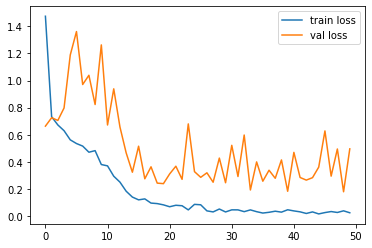

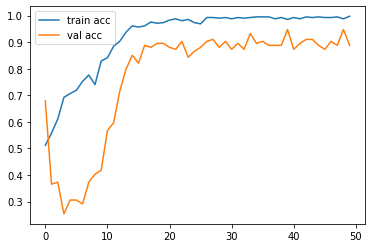

<Figure size 432x288 with 0 Axes>

In [15]:
'''
 Stampo il grafico della Loss
'''
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

'''
 Stampo il grafico dell'accuratezza
'''
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [16]:
'''
 Salvo il Modello
'''


from tensorflow.keras.models import load_model

model.save('Desease_vgg19.h5')

In [17]:
'''
 Effettuo le predizioni del modello
'''
y_pred = model.predict(test_set)

y_pred

array([[2.02494301e-02, 9.79750574e-01],
       [3.63775907e-04, 9.99636173e-01],
       [9.99816477e-01, 1.83561118e-04],
       [9.64130223e-01, 3.58697772e-02],
       [9.99741137e-01, 2.58826854e-04],
       [1.00000000e+00, 7.22633731e-10],
       [5.68274350e-04, 9.99431670e-01],
       [1.00000000e+00, 5.36903189e-10],
       [1.33474148e-03, 9.98665214e-01],
       [1.00000000e+00, 8.26683085e-30],
       [2.97915400e-03, 9.97020781e-01],
       [9.98750567e-01, 1.24941906e-03],
       [5.42727124e-04, 9.99457300e-01],
       [9.99658346e-01, 3.41666513e-04],
       [9.99998450e-01, 1.50625897e-06],
       [1.51859209e-01, 8.48140836e-01],
       [1.00000000e+00, 1.65889810e-29],
       [4.71577346e-02, 9.52842295e-01],
       [1.31591596e-03, 9.98684108e-01],
       [1.58373639e-03, 9.98416305e-01],
       [1.00000000e+00, 1.13102072e-09],
       [7.38085330e-01, 2.61914611e-01],
       [1.00000000e+00, 1.30312410e-08],
       [1.93921442e-03, 9.98060763e-01],
       [9.999935

In [23]:
'''
 Seleziono solo la classe col valore più alto per ogni
 predizione
'''

import numpy as np
y_pred = np.argmax(model.predict(test_set), axis=1)

y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1], dtype=int64)

In [24]:
'''
 Ricarico il modello per non riallenarlo ogni volta
 (Questo se è stato già salvato una volta)
'''

from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model=load_model('Desease_vgg19.h5')

In [25]:
'''
 Carico u'immagine
'''

img=image.load_img('Dataset/Test/Parasite/C39P4thinF_original_IMG_20150622_105554_cell_10.png',target_size=(224,224))


In [26]:
'''
 Trasformo l'immagine in un arrayt
'''

x=image.img_to_array(img)
#x

In [27]:
'''
 Effettuo lo shape dell'immagine
'''
x.shape

(224, 224, 3)

In [28]:
'''
 Divido l'immagine in un range di colori per
 pixel
'''
x=x/255

In [29]:
'''
 Aggiungo all'immagine l'impostazione per i 
 3 canali (RGB)
'''
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
#img_data.shape

In [30]:
'''
 Effettuo la predizione sull'immagine
'''
model.predict(img_data)

array([[1., 0.]], dtype=float32)

In [31]:
'''
 Seleziono la classe col valore più alto 
'''

a=np.argmax(model.predict(img_data), axis=1)
#print(a)

In [32]:
'''
 Stampo il risultato
'''

if(a==1):
    print("Uninfected")
else:
    print("Infected")

Infected
